In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score,  auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


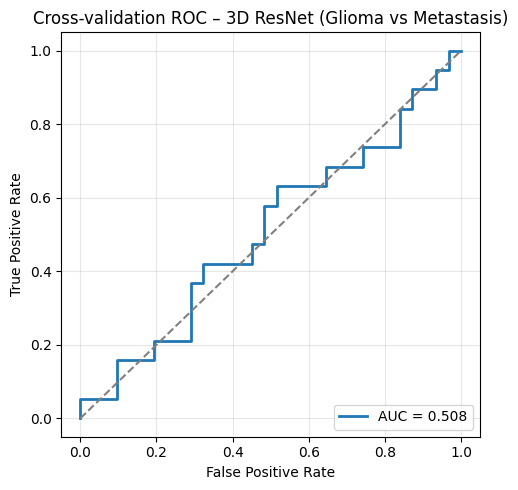

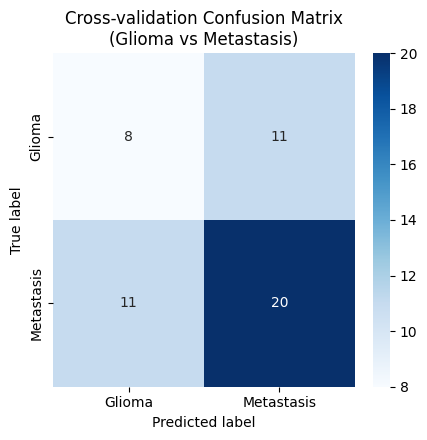

Accuracy:  0.5600
Precision: 0.4211
Recall:    0.4211
F1 Score:  0.4211


In [11]:

# -----------------------
# 1. CROSS-VALIDATION PLOTS
# -----------------------

# Load your saved CV predictions 
cv_labels = np.load("/home/btchatch/links/scratch/mri/BrainIAC/cv_labels_3dresnet_multi.npy")
cv_probs  = np.load("/home/btchatch/links/scratch/mri/BrainIAC/cv_probs_3dresnet_multi.npy")
cv_preds  = np.load("/home/btchatch/links/scratch/mri/BrainIAC/cv_preds_3dresnet_multi.npy")

#--- ROC curve (CV) ---
fpr_cv, tpr_cv, _ = roc_curve(cv_labels, cv_probs)
auc_cv = roc_auc_score(cv_labels, cv_probs)

plt.figure(figsize=(5, 5))
plt.plot(fpr_cv, tpr_cv, label=f"AUC = {auc_cv:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cross-validation ROC – 3D ResNet (Glioma vs Metastasis)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Confusion matrix (CV) ---
# Order labels so row/col 0 = Glioma, 1 = Metastasis
class_names = ["Glioma", "Metastasis"]
cm_cv = confusion_matrix(cv_labels, cv_preds, labels=[1, 0])

plt.figure(figsize=(4.5, 4.5))
sns.heatmap(
    cm_cv,
    annot=True,
    fmt="d",
    cmap="Blues",          # blue color map like your example
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=True
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Cross-validation Confusion Matrix\n(Glioma vs Metastasis)")
plt.tight_layout()
plt.show()


accuracy = accuracy_score(cv_labels, cv_preds)
precision = precision_score(cv_labels, cv_preds)
recall = recall_score(cv_labels, cv_preds)
f1 = f1_score(cv_labels, cv_preds)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

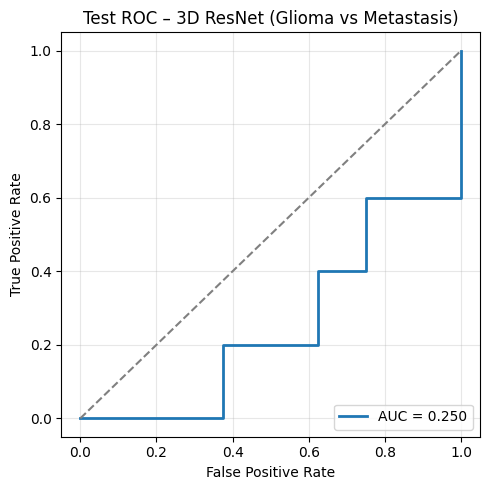

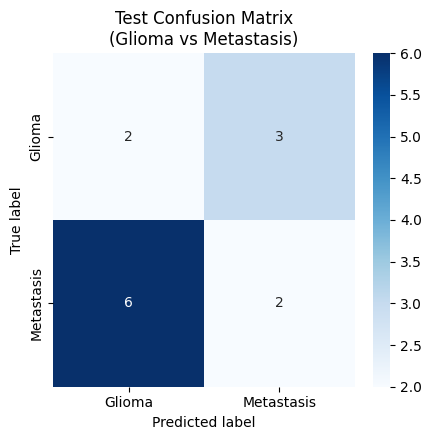

Accuracy:  0.3077
Precision: 0.2500
Recall:    0.4000
F1 Score:  0.3077


In [13]:

# ----- LOAD TEST CSV -----
#  path to your actual CSV file
test_df = pd.read_csv("/home/btchatch/links/scratch/mri/BrainIAC/test_predictions_3dresnet_multi.csv")

# columns: subject, true_label, pred_label, prob_glioma
y_test       = test_df["true_label"].values          # 0 = metastasis, 1 = glioma
y_test_probs = test_df["prob_glioma"].values        # P(glioma)
y_test_preds = test_df["pred_label"].values         # hard predictions 0/1

# --- ROC (Test) ---
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
auc_test = roc_auc_score(y_test, y_test_probs)

plt.figure(figsize=(5, 5))
plt.plot(fpr_test, tpr_test, label=f"AUC = {auc_test:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC – 3D ResNet (Glioma vs Metastasis)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Confusion matrix (Test) ---
# order so 0-axis = Glioma, 1-axis = Metastasis on the plot
cm_test = confusion_matrix(y_test, y_test_preds, labels=[1, 0])
class_names = ["Glioma", "Metastasis"]

plt.figure(figsize=(4.5, 4.5))
sns.heatmap(
    cm_test, annot=True, fmt="d", cmap="Blues",
    xticklabels=class_names, yticklabels=class_names, cbar=True
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Test Confusion Matrix\n(Glioma vs Metastasis)")
plt.tight_layout()
plt.show()

accuracy = accuracy_score(y_test, y_test_preds)
precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1 = f1_score(y_test, y_test_preds)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

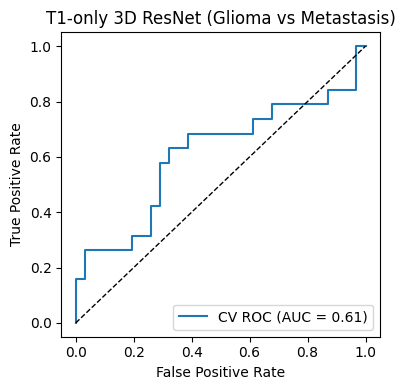

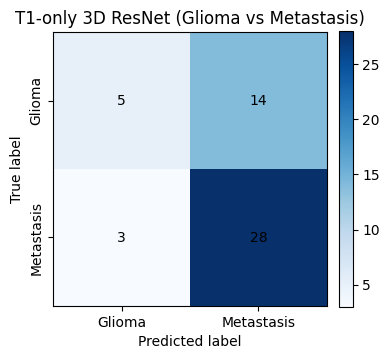

CV classification report (pooled):
                precision    recall  f1-score   support

Metastasis (0)       0.67      0.90      0.77        31
    Glioma (1)       0.62      0.26      0.37        19

      accuracy                           0.66        50
     macro avg       0.65      0.58      0.57        50
  weighted avg       0.65      0.66      0.62        50

Accuracy:  0.6600
Precision: 0.6250
Recall:    0.2632
F1 Score:  0.3704


In [14]:

# ----------------------------------------------------------------------
# 1. CV RESULTS (from train+val 5-fold cross-validation)
# ----------------------------------------------------------------------

# These were saved by the training script
cv_labels = np.load("/home/btchatch/links/scratch/mri/BrainIAC/cv_labels_3dresnet_t1.npy")   # true labels (0=Metastasis, 1=Glioma)
cv_probs  = np.load("/home/btchatch/links/scratch/mri/BrainIAC/cv_probs_3dresnet_t1.npy")    # P(Glioma)
cv_preds  = np.load("/home/btchatch/links/scratch/mri/BrainIAC/cv_preds_3dresnet_t1.npy")    # predicted labels (0/1)

# ----- ROC curve for CV (pooled across folds) -----
fpr_cv, tpr_cv, _ = roc_curve(cv_labels, cv_probs)
auc_cv = auc(fpr_cv, tpr_cv)

plt.figure(figsize=(4, 4))
plt.plot(fpr_cv, tpr_cv, label=f"CV ROC (AUC = {auc_cv:.2f})")
plt.plot([0, 1], [0, 1], "k--", linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("T1-only 3D ResNet (Glioma vs Metastasis)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ----- Confusion matrix for CV (pooled across folds) -----
# 1 = Glioma, 0 = Metastasis
cm_cv = confusion_matrix(cv_labels, cv_preds, labels=[1, 0])
class_names = ["Glioma", "Metastasis"]

fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm_cv, interpolation="nearest", cmap="Blues")
ax.set_title("T1-only 3D ResNet (Glioma vs Metastasis)")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# Make y-axis labels vertical
plt.setp(ax.get_yticklabels(), rotation=90, va="center")

# Annotate counts
import itertools
for i, j in itertools.product(range(cm_cv.shape[0]), range(cm_cv.shape[1])):
    ax.text(
        j, i, cm_cv[i, j],
        horizontalalignment="center",
        verticalalignment="center",
    )

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

print("CV classification report (pooled):")
print(classification_report(cv_labels, cv_preds, target_names=["Metastasis (0)", "Glioma (1)"]))


accuracy = accuracy_score(cv_labels, cv_preds)
precision = precision_score(cv_labels, cv_preds)
recall = recall_score(cv_labels, cv_preds)
f1 = f1_score(cv_labels, cv_preds)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

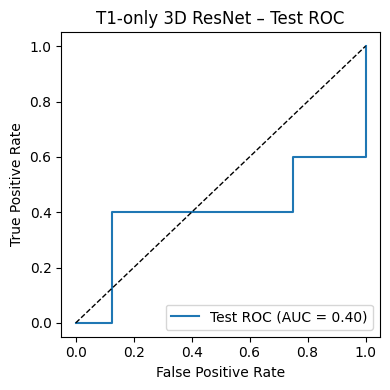

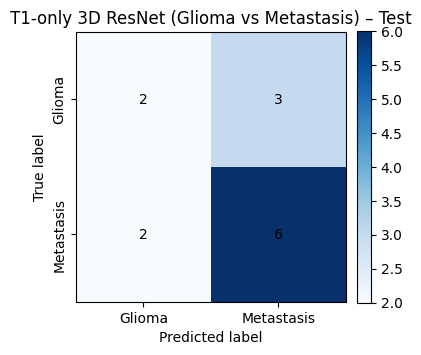

Test classification report:
                precision    recall  f1-score   support

Metastasis (0)       0.67      0.75      0.71         8
    Glioma (1)       0.50      0.40      0.44         5

      accuracy                           0.62        13
     macro avg       0.58      0.57      0.58        13
  weighted avg       0.60      0.62      0.61        13

Accuracy:  0.6154
Precision: 0.5000
Recall:    0.4000
F1 Score:  0.4444


In [15]:
# ----------------------------------------------------------------------
# 2. TEST RESULTS (final model evaluated on held-out test set)
# ----------------------------------------------------------------------

# This CSV was saved by train_full_and_eval_test(...)
# Columns: subject, true_label, pred_label, prob_glioma
test_df = pd.read_csv("/home/btchatch/links/scratch/mri/BrainIAC/test_predictions_3dresnet_t1.csv")

y_true = test_df["true_label"].values      # 0=Metastasis, 1=Glioma
y_pred = test_df["pred_label"].values
y_prob = test_df["prob_glioma"].values     # P(Glioma)

# ----- ROC curve for test -----
fpr_test, tpr_test, _ = roc_curve(y_true, y_prob)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(4, 4))
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], "k--", linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("T1-only 3D ResNet – Test ROC")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ----- Confusion matrix for test -----
cm_test = confusion_matrix(y_true, y_pred, labels=[1, 0])

fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm_test, interpolation="nearest", cmap="Blues")
ax.set_title("T1-only 3D ResNet (Glioma vs Metastasis) – Test")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

# vertical true labels
plt.setp(ax.get_yticklabels(), rotation=90, va="center")

for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
    ax.text(
        j, i, cm_test[i, j],
        horizontalalignment="center",
        verticalalignment="center",
    )

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

print("Test classification report:")
print(classification_report(y_true, y_pred, target_names=["Metastasis (0)", "Glioma (1)"]))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
